In [1]:
# Typycal Python tools
import sys
import numpy as np
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import os.path

import pylab
from matplotlib import pyplot, cm

# Import sci-kit learn libraries for ML: Linear Regression and SVM
from sklearn import linear_model as linMod
from sklearn import svm, grid_search
# To split into training and test
from sklearn.cross_validation import train_test_split

# To show plots inline
%matplotlib inline

## Example 1. Classify students into admitted/not admitted classes

Imagine a group of students taking two exams as part of the process to being admitted into university. You should look at this example as a more elaborate admission process as opposed to the tradition mean of two exams. 

### A. Plotting dataset

We begin by plotting the dataset with the corresponding labels.

In [2]:
def PlotDataTXT():
    # Read data to data frame
    df = pd.read_csv("data/students_admitted.txt")
    # Turn dataframe into matrix
    data = df.values    
    # We separate the given training set into positive (accepted) and negative (not accepted)
    # according to "1" and "0" given in the training set.
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    # We add the X and Y labels...
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    # ... and set the X and Y limit values of the plot.
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    # We generate the scatter plot according to the separation we just did.
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o',
                   s=50, linewidths=1, label="Not admitted" )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+',
                   s=50, linewidths=2, label="Admitted" )
    # And add legends
    pyplot.legend()

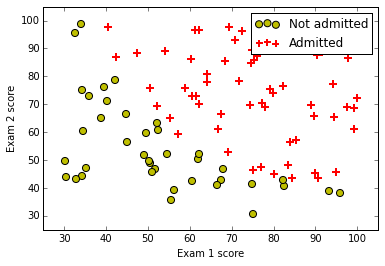

In [3]:
PlotDataTXT()

The plot suggests that we can separate the two classes with a linear boundary. Let's try to do so by means of logisit regression. We first define plotting functions to avoid extensive writing to have plotting capabilities.

### B. Auxiliary plotting functions

The following two functions generate, respectively, plots of the training set and the boundary generated by the model.

In [4]:
def plot(data):
    """
    This function plots training set with selected labels
    """
    positives = data[data[:, 2] == 1]
    negatives = data[data[:, 2] == 0]
    
    # We add the X and Y labels...
    pyplot.xlabel("Exam 1 score")
    pyplot.ylabel("Exam 2 score")
    
    pyplot.xlim([25, 105])
    pyplot.ylim([25, 105])
    pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50,
                   linewidths=1 )
    pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50,
                   linewidths=2)
    

def PlotBoundary( X, TrainedModel ):
    """
    This function plots the boundary decision generated by the trained model
    """
    
    x1plot = np.linspace( min(X[:, 0]), max(X[:, 0]), 100 )
    x2plot = np.linspace( min(X[:, 1]), max(X[:, 1]), 100 )
    X1, X2 = np.meshgrid( x1plot, x2plot )
    
    vals = np.zeros(X1.shape) 
   
    aux_shape = X1.shape
        
    for i in range(aux_shape[1]):
        this_X = np.c_[ X1[:, i], X2[:, i] ]
        vals[:, i] = TrainedModel.predict( this_X )
    pyplot.contour( X1, X2, vals, colors='blue' )

### C. Logistic regression and its associated boundary decision

We finally generate the logistic regression model and plot its corresponding boundary decision

In [5]:
def LinRegr_Boundary(Cval):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    # Read data to dataframe
    df = pd.read_csv("data/students_admitted.txt")
    # Get values from it to a numpy array
    mat = df.values
    # Split data into features and labels
    X = mat[:,:2] ; y = mat[:,2]
    
    # Instantiate logistic regression
    logreg = linMod.LogisticRegression(C=Cval)
    # Fit model 
    logreg.fit(X, y )
    # Plot training set...
    plot( mat )
    # ... and resulting separating line
    PlotBoundary( X, logreg )
    

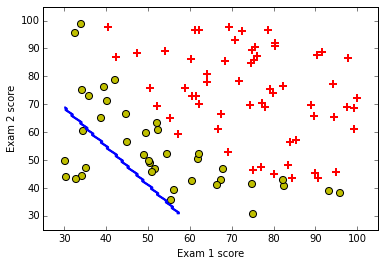

In [6]:
LinRegr_Boundary(0.3)

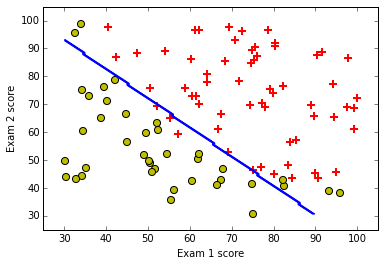

In [7]:
LinRegr_Boundary(1e1)

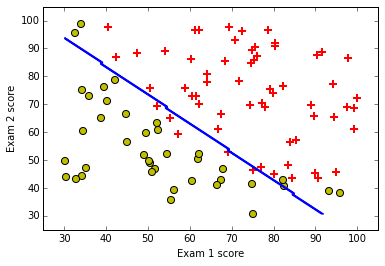

In [8]:
LinRegr_Boundary(1e2)

### D. Support vector machine (SVM) and its associated boundary decision

In [9]:
def SVM_Boundary_01(Cval,sigmaVal,kernel_type):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    # Read data to dataframe
    df = pd.read_csv("data/students_admitted.txt")
    # Get values from it to a numpy array
    mat = df.values
    # Split data into features and labels
    X = mat[:,:2] ; y = mat[:,2]
    
    # gamma is actually inverse of sigma
    svm_ = svm.SVC(C=Cval, kernel=kernel_type, gamma = 1.0 / sigmaVal ) 
    svm_.fit( X, y )


    # Plot training set...
    plot( mat )
    # ... and resulting separating line
    PlotBoundary( X, svm_ )
    

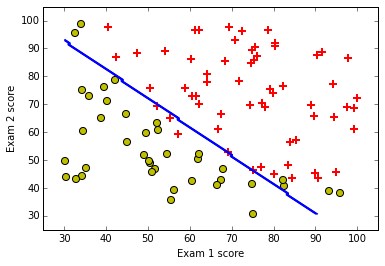

In [10]:
Cval = 10.
sigmaVal = 2000.
kernel_type = 'linear'
SVM_Boundary_01(Cval,sigmaVal,kernel_type)

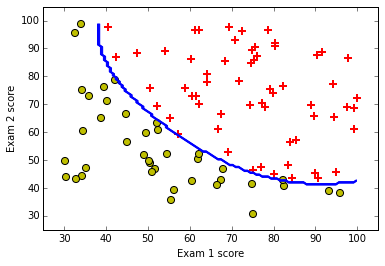

In [14]:
Cval = 10.
sigmaVal = 2000.
kernel_type = 'rbf'
SVM_Boundary_01(Cval,sigmaVal,kernel_type)

## Example 2. Classify tumors into malignant/not malignant

We now explore a more challenging situation. Imagine we have dataset that contains information regrading tumors detected in patients and we need to classify them into malignant and not malignant. Here is then crucial to avoid missclassification. 

The next two functions are written to plot the dataset

In [15]:
def plotData( data, addLabel=True ):
    # We separate the given training set into positive (malignant) and negative
    # (not malignant)
    # according to "1" and "0" given in the training set.
    positives  = data[data[:,2] == 1]
    negatives  = data[data[:,2] == 0]
    # We add the X and Y labels...
    pyplot.xlabel("A")
    pyplot.ylabel("B")
    # ... and set the X and Y limit values of the plot.
    pyplot.xlim([0, 1.05])
    pyplot.ylim([0.35, 1])
    
    # We make a distinction whether to include labels
    if addLabel:
        # We generate the scatter plot according to the separation we just did.
        pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50,
                   linewidths=1 , label="Not malignant" )
        pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50,
                   linewidths=2 , label="Malignant" )
        # And add legends
        pyplot.legend()
    
    else:
         # We generate the scatter plot according to the separation we just did.
        pyplot.scatter( negatives[:, 0], negatives[:, 1], c='y', marker='o', s=50,
                   linewidths=1 )
        pyplot.scatter( positives[:, 0], positives[:, 1], c='r', marker='+', s=50,
                   linewidths=2 )
        
def PlotDataFrame():

    df = pd.read_csv("data/tumors_classification.csv" , index_col=False)
    mat = df.values[:,1:]
    mat[:,2] = mat[:,2].astype(int)
    plotData( mat , addLabel= True )

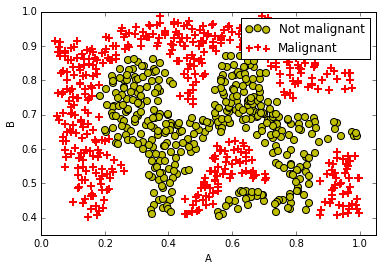

In [16]:
PlotDataFrame()

As we can see from the previous plot it is not possible to classify data with a linear boundary. Let's then apply SVM directly. 

In [17]:
def SVM_Boundary_02(Cval,sigmaVal,kernel_type):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    
    df = pd.read_csv("data/tumors_classification.csv" , index_col=False)
    mat = df.values[:,1:]
    mat[:,2] = mat[:,2].astype(int)
    #plotData( mat )
    
    
    # Split data into features and labels
    X = mat[:,:2] ; y = mat[:,2]
    
    # gamma is actually inverse of sigma
    svm_ = svm.SVC(C=Cval, kernel=kernel_type, gamma = 1.0 / sigmaVal ) 
    svm_.fit( X, y )


    # Plot training set...
    plotData( mat , addLabel=False )
    # ... and resulting separating line
    PlotBoundary( X, svm_ )
    

Let's explore the effect of parameters Cval and sigmaVal in the classifier.

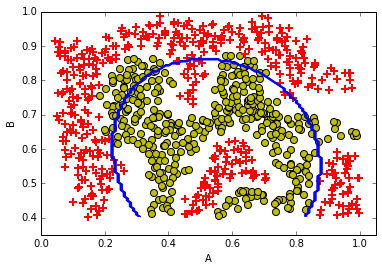

In [20]:
Cval = 1.
sigmaVal = 1.
kernel_type = 'rbf'
SVM_Boundary_02(Cval,sigmaVal,kernel_type)

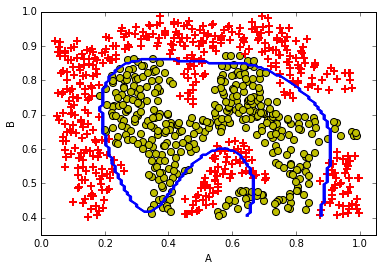

In [21]:
Cval = 1.
sigmaVal = 1e-1
kernel_type = 'rbf'
SVM_Boundary_02(Cval,sigmaVal,kernel_type)

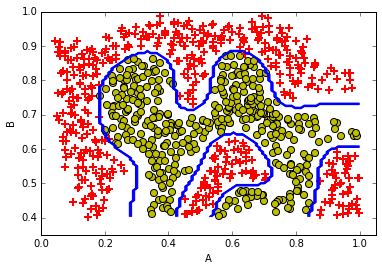

In [22]:
Cval = 1.
sigmaVal = 1e-2
kernel_type = 'rbf'
SVM_Boundary_02(Cval,sigmaVal,kernel_type)

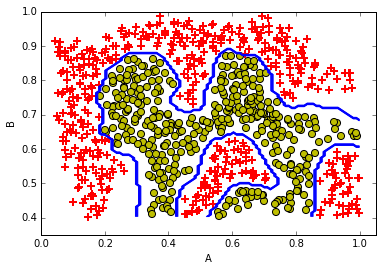

In [23]:
Cval = 1.
sigmaVal = 1e-3
kernel_type = 'rbf'
SVM_Boundary_02(Cval,sigmaVal,kernel_type)

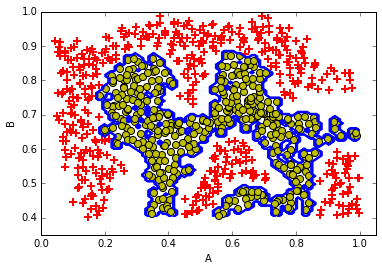

In [24]:
Cval = 1.
sigmaVal = 1e-4
kernel_type = 'rbf'
SVM_Boundary_02(Cval,sigmaVal,kernel_type)

It is important to keep in mind that in the previous plots we have used all the given data to build the classifier. In what follows we will use cross-validation to do search grid in the hyperparameters and build the "best" possible classifier.

## Cross-validation and grid search

We now split our data in three subsets: train (60%), validation (20%) and test (20%). We will explain the purpose of each as we show the following cells.

In [25]:
# We first read data to a data frame
df = pd.read_csv("data/tumors_classification.csv" , index_col=False)
# Grab the meaningful data and transform it accordingly.
mat = df.values[:,1:]
mat[:,2] = mat[:,2].astype(int)
print "Total number of records " , mat.shape[0]
# We split data into train and an auxiliary dataset...
train_, test_aux = train_test_split(mat, train_size=0.6)
# ... and we split this auxiliary dataset into validation and test sets
val_, test_ = train_test_split(test_aux, train_size=0.5)
print "Records in training set " , train_.shape[0]
print "Records in validation set " , val_.shape[0]
print "Records in test set " , test_.shape[0]


Total number of records  863
Records in training set  517
Records in validation set  173
Records in test set  173


Plotting train set

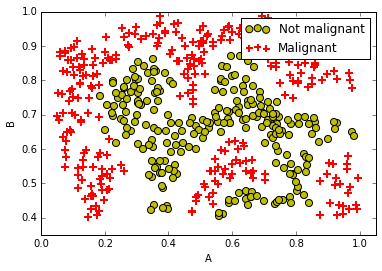

In [26]:
plotData( train_ )

In [27]:
# Split data into features and labels. We do this for training, validation and test set
X_train = train_[:,:2] ; y_train = train_[:,2]
X_val = val_[:,:2] ; y_val = val_[:,2]
X_test = test_[:,:2] ; y_test = test_[:,2]

In what follows we will train our model for different values of Cval and sigmaVal. For each of this pair of values we will train the model with the training set and evaluate its perfomance in the validation set.

In [61]:
# Empty lists to store scores and parameters...
list_score = []
list_par = []
# We do grid search in Cval ...
for Cval in [1e-2,1e-1,1.,1e1,1e2]:
    # ... and sigmaVal
    for sigmaVal in [1e-2,1e-1,1.,1e1,1e2]:
        # For the pair in turn we instantiate the model...
        svm_ = svm.SVC(C=Cval, kernel='rbf', gamma = 1.0 / sigmaVal ) 
        # ... train it with the training set ...
        svm_.fit( X_train, y_train )
        # ... and evaluate perfomance in the validation set ...
        score_ = svm_.score( X_val,y_val )
        # If desired, print values...
        #print Cval, sigmaVal, score_
        # Add score and parameters to the corresponding lists...
        list_score.append(score_)
        list_par.append([Cval,sigmaVal])

# Store maximum score -- SVM is about maximizing margin 
max_score = max(list_score)

In [62]:
print "Maximum score " ,  max_score

Maximum score  0.994219653179


We will find indices that correspond to the maximum score in list_score and see what parameters they correspond to

In [66]:
selected_parameters = []
indices_ = [i for i, j in enumerate(list_score) if float(j) == max_score]
for k in indices_:
    print list_par[k]
    selected_parameters.append(list_par[k])

[10.0, 0.01]


We observe that two different values of Cval provide the same score. Let's visualize results in the test set. For this purpouse we first write the function that does the plotting needed.

In [64]:
def SVM_Boundary_Data(Cval,sigmaVal,kernel_type,X,y):
    """
    This function reads in the reciprocal of the regularization parameter to run
    a logistic regression and plot the boundary decission.
    Note.- Smaller Cval values specify stronger regularization.
    """
    
    # gamma is actually inverse of sigma
    svm_ = svm.SVC(C=Cval, kernel=kernel_type, gamma = 1.0 / sigmaVal ) 
    svm_.fit( X, y )

    mat = np.c_[X,y]
    # Plot training set...
    plotData( mat , addLabel=False )
    # ... and resulting separating line
    PlotBoundary( X, svm_ )
    # Perform classification on X
    #print svm_.predict(X)
    #print y - svm_.predict(X)

Plot for every pair of parameters found

Parameters Cval and sigmaVal [10.0, 0.01]


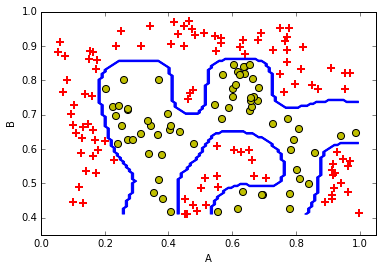

In [70]:
kernel_type = 'rbf'
for k in selected_parameters:
    print "Parameters Cval and sigmaVal" , k
    Cval,sigmaVal = k
    SVM_Boundary_Data(Cval,sigmaVal,kernel_type,X_test,y_test)
    